<a href="https://colab.research.google.com/github/yw824/Alone_Machine_DeepLearninig/blob/main/02_1_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시작
데이터 : 입력 //
정답 : target //
이 둘을 합쳐 훈련 데이터라고 부른다.
 입력으로 사용된 길이와 무게 : 특성 ( feature )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

먼저 1장에서처럼 도미와 빙어의 데이터를 합쳐 하나의 파이썬 리스트로 준비 / 
1장 3절과 같이 생선의 길이와 무게를 위한 리스트 준비

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

두 파이썬 리스틀 순회하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 생성

In [ ]:
fish_data = [ [ l , w ] for l , w in zip( fish_length , fish_weight ) ]  
fish_target = [ 1 ] * 35 + [0] * 14

이때 하나의 생선 데이터를 ' 샘플 ' 이라고 명명 

도미와 빙어는 각각 35마리 , 14마리가 있으므로 전체 데이터는 49개의 샘플 존재
// 사용하는 특성은 길이와 무게 2개

처음 35개를 훈련 세트 , 나머지 14개를 테스트 세트로 사용

In [ ]:
print( fish_data[ 4 ])

[29.0, 430.0]


슬라이싱 예제

In [ ]:
print( fish_data[ 0 : 5 ])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


fit() 메서드를 호출해 모델을 훈련하고 , 테스트 세트로 score() 메서드를 호출해 평가

In [ ]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[ : 35 ]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[ : 35 ]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[ 35 : ]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[ 35 : ]

데이터를 준비했으니 훈련 세트로 fit() 메서드를 호출해 모델을 훈련하고 테스트 세트로 score() 메서드를 호출해 평가

In [ ]:
kn = kn.fit( train_input , train_target);
kn.score(test_input,test_target)

0.0

테스트 세트에 빙어 없이 훈련하면 빙어를 구분할 수 없다. 우리는 도미만 넣고 훈련하여 빙어의 특성을 훈련하지 못했다

샘플링이 한쪽으로 치우쳤다는 의미로 ' 샘플링 편향 ' 이라 부른다.

훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련 세트와 테스트 세트를 만들어야 한다.

# < numpy >

개별적으로 고차원 리스트 표현하려면 매우 번거롭다. -> 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.

In [ ]:
# 먼저 numpy를 import 
import numpy as np

파이썬 리스트를 numpy 배열로 바꾸기

In [ ]:
# 파이썬 리스트를 numpy 배열로 바꾸기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
# input_arr 출력
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# 아래의 명령어 사용하면 ( 샘플 수 , 특성 수 ) 를 출력
print(input_arr.shape)

(49, 2)


매번 훈련 세트와 테스트 세트로 나눌 인덱스 값을 기억할 수는 없으니 샘플을  무작위로 선택 -> 무작위로 훈련 세트를 나누는 셈

In [ ]:
np.random.seed(42)
index = np.arange(49) # arange 함수 안에 49 전달하면 0 ~ 48까지 1씩 증가하는 배열 생성 ( 49개 )
np.random.shuffle(index) # random 패키지에 있는 shuffle 함수는 주어진 배열을 무작위로 섞는다.

In [ ]:
# 만들어진 인덱스 출력 -> 0부터 48까지 정수가 잘 섞였다.
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


이제 랜덤하게 섞인 인덱스를 사용해 전체 데이터를 훈련 세트와 테스트 세트로 나눈다.

넘파이는 '배열 인덱싱' 이라는 기능 제공 -> 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소 선택 가능

In [ ]:
# 예 ) 다음처럼 input_arr 에서 두 번째와 네 번째 샘플을 선택하여 출력 가능
print( input_arr[ [ 1 , 3 ] ] )

[[ 26.3 290. ]
 [ 29.  363. ]]


앞서 만든 index 배열의 처음 35개를 input_arr 와 target_arr로 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 만들자.

In [ ]:
train_input = input_arr[ index[ : 35 ] ]
train_target = input_arr[ index[ 35 : ] ]

만들어진 index의 첫 번째 값은 13이다. 따라서 train_input의 첫 번째 원소는 input_arr의 열네번째 원소가 들어 있을 것이다.

In [ ]:
print( input_arr[ 13 ] , train_input[ 0 ] )

[ 32. 340.] [ 32. 340.]


이번에는 나머지 14개를 테스트 세트로 만들기

In [ ]:
test_input = input_arr[ index[ 35 : ] ]
test_target = target_arr[ index[ 35 : ] ]

모든 데이터 준비 완료 -> 훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 출력

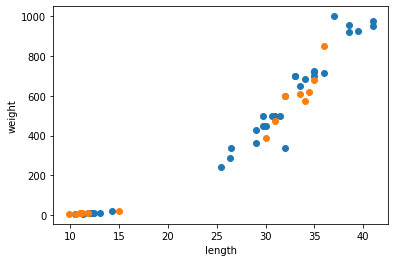

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( train_input[ : , 0 ] , train_input[ : , 1 ] ) 
plt.scatter( test_input[ : , 0 ] , test_input[ : , 1 ] )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# < 두 번째 머신러닝 프로그램 >

앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련한다.

fit() 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버린다.

이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다.

In [ ]:
# 여기에서는 단순하게 이전에 만든 kn 객체를 그대로 사용
kn = kn.fit( train_input,train_target); # 에러뜬다.

ValueError: ignored

In [ ]:
kn.score( test_input , test_target )
# score 결과값이 1.0이 나와야 함 // 

0.5714285714285714

###predict() 메서드로 테스트 세트의 예측 결과와 실제 타깃을 확인
 predict() 메서드가 기억나지 않으면 1장 3절 복습

In [ ]:
# 코랩은 셀의 마지막 코드 결과를 자동으로 출력해 주기 때문에 print() 함수를 사용하지 않아도 된다.
kn.predict(test_input)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])